In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("train_data.csv")
train_data[0:21]

,s1,s2,s3,s4,s5,s6,s7,digitID
0,0,1,1,0,0,0,0,1
1,0,1,1,1,0,0,1,1
2,0,1,0,0,1,0,1,1
3,0,1,1,1,0,0,0,1
4,1,1,1,0,0,0,0,1
5,0,1,1,0,0,0,0,1
6,0,1,1,0,0,0,0,1
7,0,1,0,0,0,0,0,1
8,0,1,1,0,0,0,0,1
9,0,0,1,1,1,1,1,1


In [3]:
# (1-4/22)*(18/22)*(17/22)*(1-5/22)*(1-4/22)*(4/22)*(1-6/22)

In [4]:
# Declaring probability array to store the probabilities of lighting the segment
prob = [[0 for i in range(7)] for j in range(10)]
prob

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

prob[0][0] represents pr(s1=1|digitID=0) <br>
prob[0][1] represents pr(s2=1|digitID=0) <br>
prob[1][0] represents pr(s1=1|digitID=1) <br>
prob[1][1] represents pr(s2=1|digitID=1)

In [5]:
# grouping the variables to get the summation of all the activated segments for a corresponding digit
data_sum = train_data.groupby(["digitID"]).sum()
data_sum

,s1,s2,s3,s4,s5,s6,s7
digitID,,,,,,,
0,16,16,17,17,19,18,7
1,3,17,16,4,3,3,5
2,15,16,1,15,14,7,18
3,16,16,14,12,6,3,16
4,5,13,18,5,2,16,19
5,18,5,15,18,6,17,18
6,4,1,17,15,13,16,17
7,17,18,15,9,3,0,3
8,15,18,17,16,12,18,14


In [6]:
# data_sum["s1"][0]

In [7]:
# Finding the probability of lighting the segments for a corresponding digit. Following the laplace smoothing operation
sequences = ["s1", "s2", "s3", "s4", "s5", "s6", "s7"]

for i in range(10):
    for j in range(7):
        prob[i][j] = ((data_sum[sequences[j]][i]+1)/22)
#         print(data_sum[sequences[j]][i])

In [8]:
# displaying the probabilities list
pro_array = np.array(prob)

prob_data = pd.DataFrame(pro_array, columns=["Pr(s1=1)","Pr(s2=1)","Pr(s3=1)","Pr(s4=1)","Pr(s5=1)","Pr(s6=1)","Pr(s7=1)"])
prob_data['Digit'] = [i for i in range(10)]
prob_data

,Pr(s1=1),Pr(s2=1),Pr(s3=1),Pr(s4=1),Pr(s5=1),Pr(s6=1),Pr(s7=1),Digit
0,0.772727,0.772727,0.818182,0.818182,0.909091,0.863636,0.363636,0
1,0.181818,0.818182,0.772727,0.227273,0.181818,0.181818,0.272727,1
2,0.727273,0.772727,0.090909,0.727273,0.681818,0.363636,0.863636,2
3,0.772727,0.772727,0.681818,0.590909,0.318182,0.181818,0.772727,3
4,0.272727,0.636364,0.863636,0.272727,0.136364,0.772727,0.909091,4
5,0.863636,0.272727,0.727273,0.863636,0.318182,0.818182,0.863636,5
6,0.227273,0.090909,0.818182,0.727273,0.636364,0.772727,0.818182,6
7,0.818182,0.863636,0.727273,0.454545,0.181818,0.045455,0.181818,7
8,0.727273,0.863636,0.818182,0.772727,0.590909,0.863636,0.681818,8
9,0.818182,0.772727,0.681818,0.227273,0.272727,0.818182,0.727273,9


Neglecting the multiplication of probability of being digit 1 or digit 2,... because all the probabilities are same as 1/9

# Testing

In [9]:
# Loading the test data
test_data = pd.read_csv("test_data.csv")
test_data.head(6)

,s1,s2,s3,s4,s5,s6,s7,digitID
0,0,1,1,0,0,1,0,1
1,0,1,1,0,0,0,0,1
2,0,1,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1
4,0,1,1,0,0,0,0,1
5,1,1,0,1,1,0,1,2


In [10]:
# An example of Pr(test_data=1|X)
((test_data["s1"][0]*prob[1][0]) + (1-test_data["s1"][0])*(1-prob[1][0])) * \
((test_data["s2"][0]*prob[1][1]) + (1-test_data["s2"][0])*(1-prob[1][1])) * \
((test_data["s3"][0]*prob[1][2]) + (1-test_data["s3"][0])*(1-prob[1][2])) * \
((test_data["s4"][0]*prob[1][3]) + (1-test_data["s4"][0])*(1-prob[1][3])) * \
((test_data["s5"][0]*prob[1][4]) + (1-test_data["s5"][0])*(1-prob[1][4])) * \
((test_data["s6"][0]*prob[1][5]) + (1-test_data["s6"][0])*(1-prob[1][5])) * \
((test_data["s7"][0]*prob[1][6]) + (1-test_data["s7"][0])*(1-prob[1][6]))

0.04324506620278541

In [11]:
# Function for predicting the data
predictions = []
for i in range(len(test_data)):
    probabilities = []
    # Calculating probability of being each digit
    for j in range(10):
        individual_prob = ((test_data["s1"][i]*prob[j][0]) + (1-test_data["s1"][i])*(1-prob[j][0])) * \
                          ((test_data["s2"][i]*prob[j][1]) + (1-test_data["s2"][i])*(1-prob[j][1])) * \
                          ((test_data["s3"][i]*prob[j][2]) + (1-test_data["s3"][i])*(1-prob[j][2])) * \
                          ((test_data["s4"][i]*prob[j][3]) + (1-test_data["s4"][i])*(1-prob[j][3])) * \
                          ((test_data["s5"][i]*prob[j][4]) + (1-test_data["s5"][i])*(1-prob[j][4])) * \
                          ((test_data["s6"][i]*prob[j][5]) + (1-test_data["s6"][i])*(1-prob[j][5])) * \
                          ((test_data["s7"][i]*prob[j][6]) + (1-test_data["s7"][i])*(1-prob[j][6]))
        probabilities.append(individual_prob)
    # print(probabilities)
    predictions.append(probabilities.index(max(probabilities)))

In [12]:
print("Predictions: ", end="")
print(np.array(predictions))
print("Actual_data: ", end="")
print(np.array(test_data['digitID']))

Predictions: [1 1 1 1 1 2 2 2 2 2 3 3 5 3 3 4 4 4 9 1 5 9 5 5 8 6 6 5 6 1 7 7 7 7 7 8 7
 0 8 0 9 9 9 9 9 0 0 0 0 0]
Actual_data: [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 8 8
 8 8 8 9 9 9 9 9 0 0 0 0 0]


In [13]:
accuracy = (predictions==test_data['digitID']).sum()/len(test_data)
print("Accuracy: " + str(accuracy))

Accuracy: 0.8


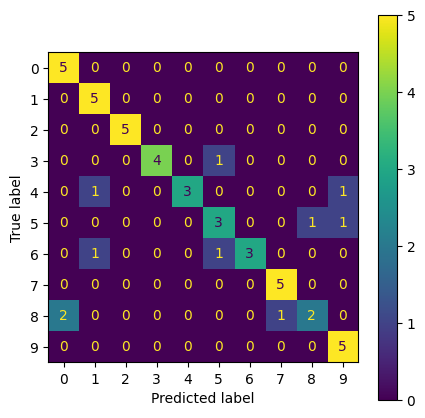

In [14]:
# Displaying the confusion matrix
from sklearn import metrics
from matplotlib import pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_data['digitID'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [i for i in range(10)])

fig, ax = plt.subplots(figsize=(5,5))

cm_display.plot(ax = ax)
plt.show()